# Hierachical Clustering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## 1. โหลด csv เข้าไปใน Python Pandas


In [2]:
df = pd.read_csv('data_student.csv')

## 2. เขียนโค้ดแสดง หัว10แถว ท้าย10แถว และสุ่ม10แถว



In [3]:
df.head(10)

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,very_low
1,0.08,0.08,0.10,0.24,0.90,High
2,0.06,0.06,0.05,0.25,0.33,Low
3,0.10,0.10,0.15,0.65,0.30,Middle
4,0.08,0.08,0.08,0.98,0.24,Low
5,0.09,0.15,0.40,0.10,0.66,Middle
6,0.10,0.10,0.43,0.29,0.56,Middle
7,0.15,0.02,0.34,0.40,0.01,very_low
8,0.20,0.14,0.35,0.72,0.25,Low
9,0.00,0.00,0.50,0.20,0.85,High


In [4]:
df.tail(10)

,STG,SCG,STR,LPR,PEG,UNS
248,0.89,0.68,0.49,0.65,0.90,High
249,0.72,0.60,0.45,0.79,0.45,Middle
250,0.68,0.63,0.65,0.09,0.66,Middle
251,0.56,0.60,0.60,0.31,0.50,Middle
252,0.54,0.51,0.55,0.64,0.19,Low
253,0.61,0.78,0.69,0.92,0.58,High
254,0.78,0.61,0.71,0.19,0.60,Middle
255,0.54,0.82,0.71,0.29,0.77,High
256,0.50,0.75,0.81,0.61,0.26,Middle
257,0.66,0.90,0.76,0.87,0.74,High


In [5]:
df.sample(10)

,STG,SCG,STR,LPR,PEG,UNS
226,0.710,0.475,0.13,0.23,0.59,Middle
173,0.400,0.420,0.58,0.75,0.16,Low
235,0.580,0.350,0.51,0.27,0.30,Low
1,0.080,0.080,0.10,0.24,0.90,High
91,0.320,0.255,0.55,0.78,0.34,Middle
243,0.520,0.850,0.06,0.27,0.25,Low
230,0.730,0.430,0.32,0.12,0.65,Middle
62,0.150,0.790,0.78,0.30,0.51,Middle
81,0.295,0.250,0.26,0.12,0.67,Middle
183,0.370,0.550,0.41,0.29,0.30,Low


## 3. ใช้ info และ describe อธิบายข้อมูลเบื้องต้น


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258 entries, 0 to 257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   STG     258 non-null    float64
 1   SCG     258 non-null    float64
 2   STR     258 non-null    float64
 3   LPR     258 non-null    float64
 4   PEG     258 non-null    float64
 5    UNS    258 non-null    object 
dtypes: float64(5), object(1)
memory usage: 12.2+ KB


In [7]:
df.describe()

,STG,SCG,STR,LPR,PEG
count,258.000000,258.000000,258.000000,258.000000,258.000000
mean,0.371147,0.355674,0.468004,0.432713,0.458539
std,0.210271,0.211962,0.245940,0.248108,0.255211
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.240750,0.210000,0.291250,0.250000,0.250000
50%,0.327000,0.302500,0.490000,0.330000,0.500000
75%,0.495000,0.497500,0.690000,0.647500,0.660000
max,0.990000,0.900000,0.950000,0.990000,0.930000


## 4. ใช้ pairplot ดูความสัมพันธ์เบื้องต้น


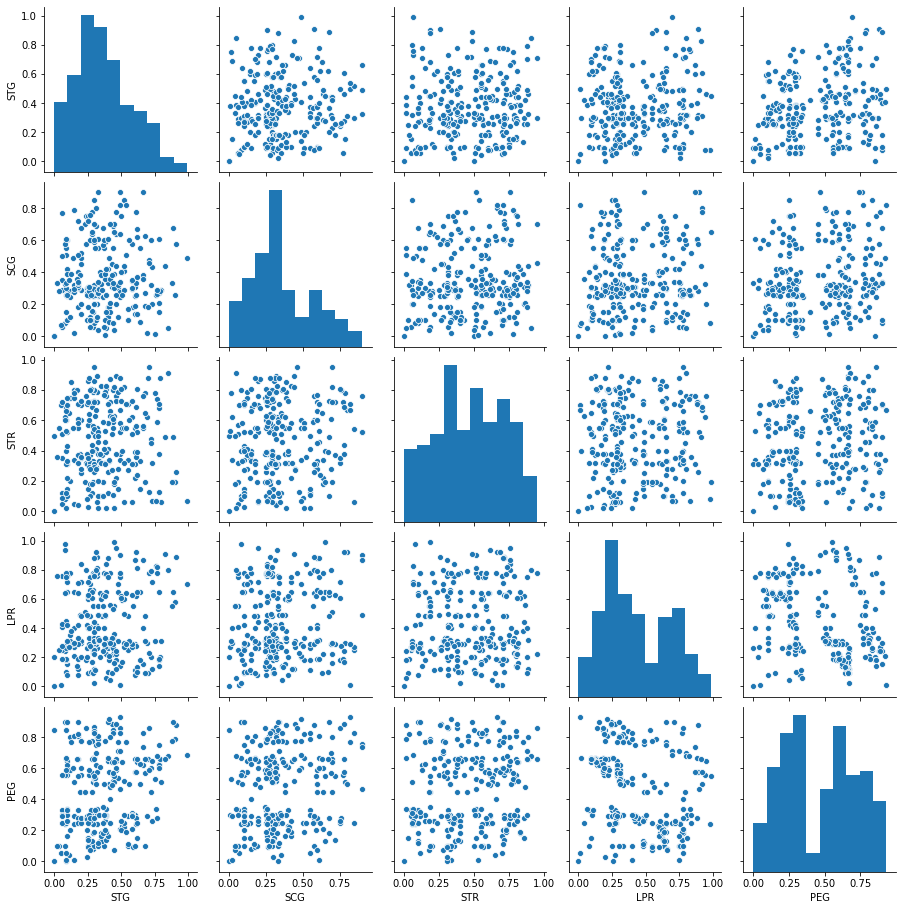

In [8]:
sns.pairplot(df)

## 5. หา Correlation ของแต่ละฟีเจอร์


In [9]:
df.corr()

,STG,SCG,STR,LPR,PEG
STG,1.000000,0.081035,0.040841,0.099543,0.206359
SCG,0.081035,1.000000,0.083732,0.097816,0.182792
STR,0.040841,0.083732,1.000000,0.036481,0.120779
LPR,0.099543,0.097816,0.036481,1.000000,-0.269574
PEG,0.206359,0.182792,0.120779,-0.269574,1.000000


## 6.   สร้าง Scatter Plot ของข้อมูลที่มี Correlation มากที่สุดและน้อยที่สุด


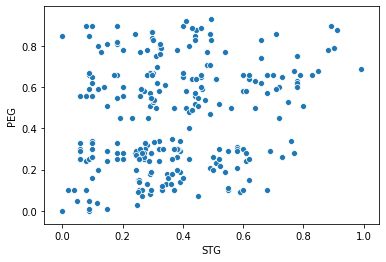

In [10]:
# most correlated pair : STG & PEG (0.206359)
sns.scatterplot(data=df, x='STG', y='PEG')

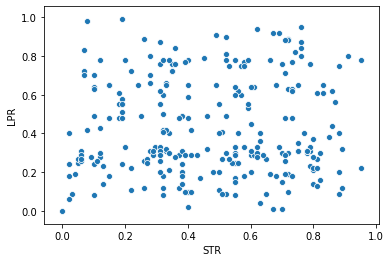

In [11]:
# least correlated pair : STR & LPR (0.036481)
sns.scatterplot(data=df, x='STR', y='LPR')

## 7. สร้าง Distribution Plot ของแต่ละฟีเจอร์


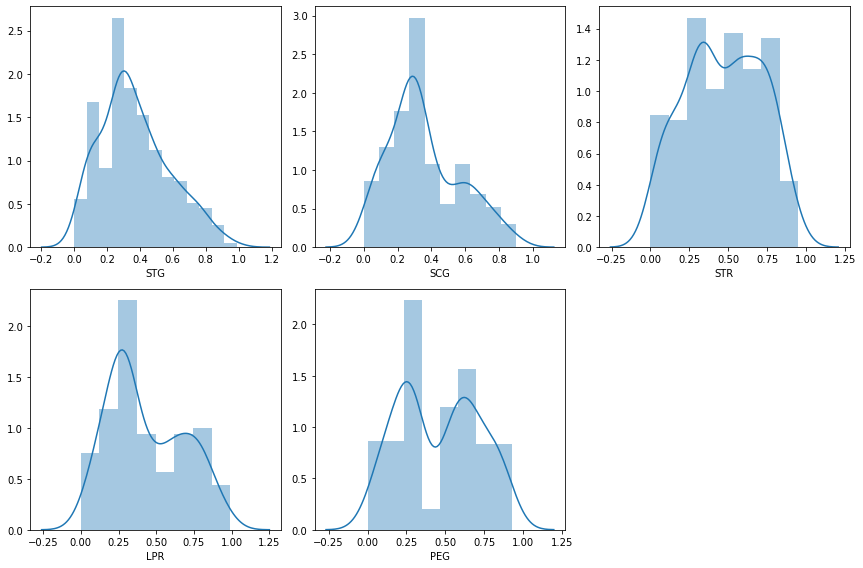

In [12]:
fig = plt.figure(figsize=(12,8))

for i,col in enumerate(df.columns) :
    if col != ' UNS':
        plt.subplot(2,3,i+1)
        sns.distplot(df[col])
fig.tight_layout()

## 8. สร้าง Box Plot ของแต่ละฟีเจอร์


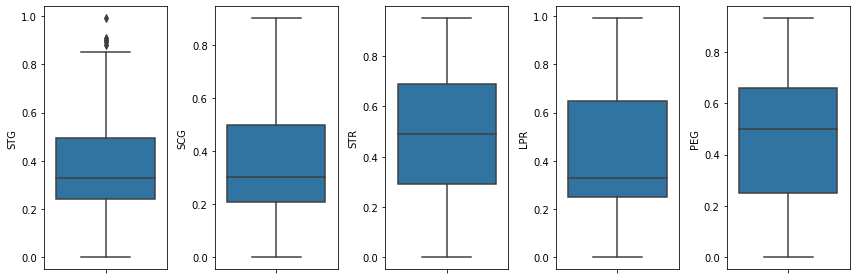

In [13]:
fig = plt.figure(figsize=(12,4))

for i,col in enumerate(df.columns) :
    if col != ' UNS':
        plt.subplot(1,5,i+1)
        sns.boxplot(df[col], orient='v')
fig.tight_layout()

## 9. สร้าง Dendrogram ของ ฟีเจอร์ STG กับ PEG เพื่อหาจำนวน Cluster ที่เหมาะสม 


In [14]:
X = df[['STG', 'PEG']].values
X

array([[0.   , 0.   ],
       [0.08 , 0.9  ],
       [0.06 , 0.33 ],
       [0.1  , 0.3  ],
       [0.08 , 0.24 ],
       [0.09 , 0.66 ],
       [0.1  , 0.56 ],
       [0.15 , 0.01 ],
       [0.2  , 0.25 ],
       [0.   , 0.85 ],
       [0.18 , 0.81 ],
       [0.06 , 0.3  ],
       [0.1  , 0.34 ],
       [0.1  , 0.9  ],
       [0.2  , 0.6  ],
       [0.12 , 0.8  ],
       [0.05 , 0.05 ],
       [0.1  , 0.33 ],
       [0.15 , 0.29 ],
       [0.2  , 0.56 ],
       [0.12 , 0.2  ],
       [0.18 , 0.66 ],
       [0.1  , 0.65 ],
       [0.18 , 0.28 ],
       [0.06 , 0.25 ],
       [0.09 , 0.85 ],
       [0.04 , 0.1  ],
       [0.09 , 0.25 ],
       [0.08 , 0.56 ],
       [0.15 , 0.81 ],
       [0.12 , 0.59 ],
       [0.15 , 0.24 ],
       [0.1  , 0.16 ],
       [0.18 , 0.82 ],
       [0.2  , 0.78 ],
       [0.06 , 0.29 ],
       [0.1  , 0.26 ],
       [0.18 , 0.33 ],
       [0.09 , 0.   ],
       [0.19 , 0.45 ],
       [0.02 , 0.1  ],
       [0.2  , 0.78 ],
       [0.14 , 0.6  ],
       [0.1

In [15]:
import scipy.cluster.hierarchy as sch

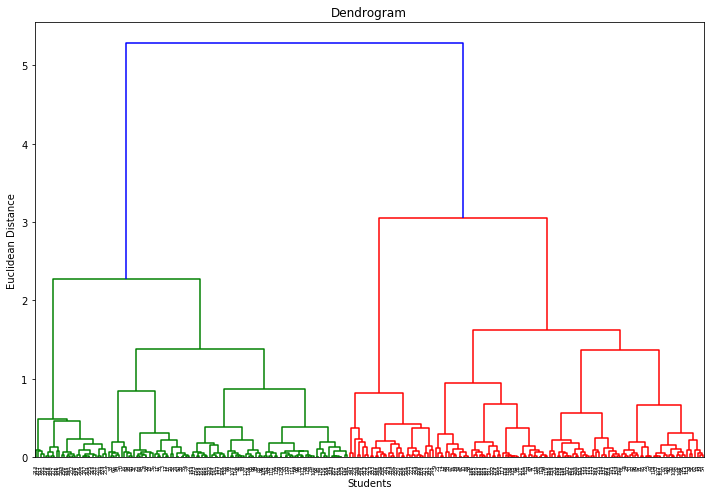

In [16]:
fig = plt.figure(figsize=(12,8))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.xlabel('Students')
plt.ylabel('Euclidean Distance')
plt.title('Dendrogram')
plt.show()

Note : จาก dendrogram จำนวน cluster ที่เหมาะสมคือ 2 clusters

## 10. สร้าง Agglomerative Hierarchical Clustering โดยใช้ฟีเจอร์ STG กับ PEG ด้วยจำนวน Cluster ที่เหมาะสม 


In [17]:
from sklearn.cluster import AgglomerativeClustering

In [18]:
cls = AgglomerativeClustering(n_clusters=2)
cluster = cls.fit_predict(X)
cluster

array([1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0])

## 11. สร้าง Clustering Visualization


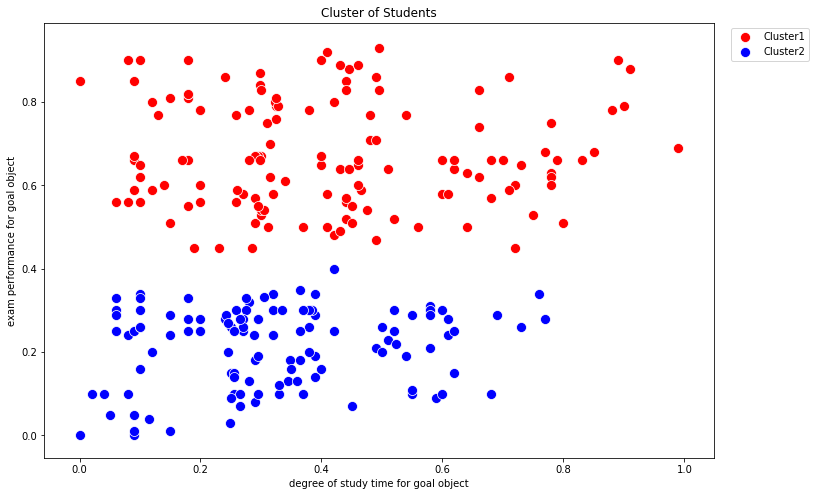

In [19]:
fig = plt.figure(figsize=(12,8))

# plot clusters
sns.scatterplot(X[cluster==0][:,0], X[cluster==0][:,1], color='r', label='Cluster1', s=100)
sns.scatterplot(X[cluster==1][:,0], X[cluster==1][:,1], color='b', label='Cluster2', s=100)

plt.xlabel('degree of study time for goal object')
plt.ylabel('exam performance for goal object')
plt.legend(bbox_to_anchor=(1.15,1))
plt.title('Cluster of Students')
plt.show()

## 12. เลือกฟีเจอร์ใดก็ได้ 2 ฟีเจอร์ที่ไม่ซ้ำเดิม


In [20]:
# เลือก STR & LPR
X = df[['STR','LPR']].values
X

array([[0.   , 0.   ],
       [0.1  , 0.24 ],
       [0.05 , 0.25 ],
       [0.15 , 0.65 ],
       [0.08 , 0.98 ],
       [0.4  , 0.1  ],
       [0.43 , 0.29 ],
       [0.34 , 0.4  ],
       [0.35 , 0.72 ],
       [0.5  , 0.2  ],
       [0.55 , 0.3  ],
       [0.51 , 0.41 ],
       [0.52 , 0.78 ],
       [0.7  , 0.15 ],
       [0.7  , 0.3  ],
       [0.75 , 0.35 ],
       [0.7  , 0.01 ],
       [0.1  , 0.08 ],
       [0.05 , 0.27 ],
       [0.25 , 0.49 ],
       [0.2  , 0.78 ],
       [0.37 , 0.12 ],
       [0.31 , 0.29 ],
       [0.32 , 0.42 ],
       [0.35 , 0.76 ],
       [0.68 , 0.18 ],
       [0.55 , 0.25 ],
       [0.6  , 0.45 ],
       [0.62 , 0.94 ],
       [0.8  , 0.21 ],
       [0.75 , 0.31 ],
       [0.75 , 0.65 ],
       [0.7  , 0.76 ],
       [0.04 , 0.19 ],
       [0.28 , 0.31 ],
       [0.12 , 0.43 ],
       [0.22 , 0.72 ],
       [0.32 , 0.08 ],
       [0.31 , 0.26 ],
       [0.38 , 0.49 ],
       [0.36 , 0.76 ],
       [0.6  , 0.2  ],
       [0.55 , 0.29 ],
       [0.6

##  13.  สร้าง Dendrogram ของฟีเจอร์ใหม่


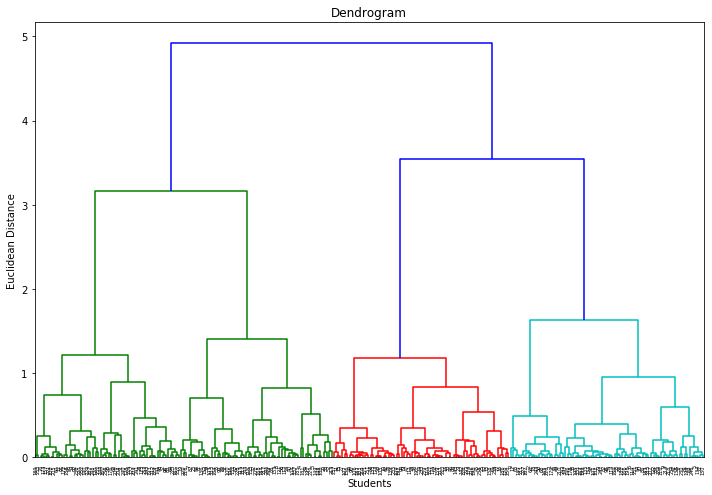

In [21]:
fig = plt.figure(figsize=(12,8))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.xlabel('Students')
plt.ylabel('Euclidean Distance')
plt.title('Dendrogram')
plt.show()

Note :  จำนวน cluster ที่เหมาะสมสำหรับ 2 features นี้ (STR & LPR) คือ 4 clusters

## 14.  สร้าง Agglomerative Hierarchical Clustering ด้วย จำนวน Cluster ที่เหมาะสม โดยใช้ฟีเจอร์ใหม่


In [22]:
cls = AgglomerativeClustering(n_clusters=4)
cluster = cls.fit_predict(X)
cluster

array([0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 2, 2, 3, 2, 2, 2, 2, 0, 0, 1, 1, 0,
       0, 1, 1, 2, 2, 2, 3, 2, 2, 3, 3, 0, 0, 1, 1, 0, 0, 1, 1, 0, 2, 3,
       2, 2, 2, 2, 3, 0, 0, 1, 1, 0, 0, 1, 1, 2, 2, 3, 3, 2, 2, 3, 3, 0,
       0, 1, 0, 0, 0, 1, 1, 2, 2, 2, 3, 2, 2, 2, 3, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 2, 3, 3, 2, 2, 3, 3, 0, 0, 1, 1, 0, 0, 1, 1, 2, 2, 2, 3, 2,
       2, 2, 3, 1, 0, 1, 1, 1, 0, 0, 3, 1, 0, 2, 3, 3, 2, 2, 3, 3, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 2, 3, 3, 2, 2, 3, 3, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 2, 2, 3, 2, 2, 3, 3, 0, 0, 1, 0, 0, 3, 1, 0, 2, 2, 3, 3, 2, 2,
       3, 3, 0, 0, 1, 1, 0, 0, 1, 1, 2, 2, 3, 3, 2, 2, 2, 3, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 2, 3, 3, 2, 2, 3, 3, 0, 0, 1, 1, 0, 0, 1, 1, 0, 2,
       3, 3, 2, 2, 3, 3, 0, 0, 1, 1, 0, 0, 3, 3, 0, 2, 3, 2, 2, 2, 3, 3,
       0, 0, 1, 1, 0, 0, 3, 1, 2, 2, 3, 3, 2, 2, 3, 3])

## 15. สร้าง Clustering Visualization


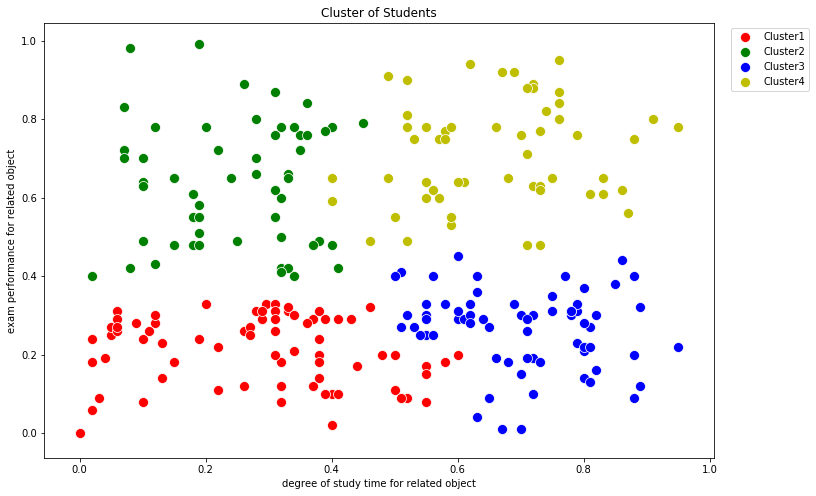

In [23]:
colors = ['r','g','b','y']

fig = plt.figure(figsize=(12,8))

# plot clusters
for i in range(4):
    sns.scatterplot(X[cluster==i][:,0], X[cluster==i][:,1], color=colors[i], label='Cluster'+str(i+1), s=100)

plt.xlabel('degree of study time for related object')
plt.ylabel('exam performance for related object')
plt.legend(bbox_to_anchor=(1.15,1))
plt.title('Cluster of Students')
plt.show()